# Dealing with Unbalanced Data using SMOTE



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

## Step-1: Download Data

In [2]:
import os
import urllib.request

data_url = 'https://raw.githubusercontent.com/elephantscale/datasets/master/credit-card-default/default.csv'
data_location = os.path.basename(data_url)

if not os.path.exists (data_location):
    print("Downloading : ", data_url)
    urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: default.csv


In [3]:
data = pd.read_csv(data_location)
data.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
6304,6305,180000,1,2,2,36,-1,-1,-1,-1,...,1863,1763,591,100,109,3626,0,907,1208,1
2445,2446,200000,1,2,2,25,1,-2,-2,-1,...,1517,48669,49635,0,0,1517,48000,1775,1992,1
12325,12326,50000,2,3,1,52,0,0,0,0,...,18426,18812,19275,1593,1301,659,682,775,584,0
10204,10205,120000,2,2,2,48,0,0,0,0,...,77242,81826,83630,2680,2741,2933,6000,3300,0,0
21999,22000,200000,2,2,2,28,0,0,0,0,...,66029,66836,68390,3000,3000,3000,2500,2632,2700,0
21235,21236,150000,1,1,2,36,2,2,2,-2,...,-46627,-46627,-46627,5068,9,0,0,0,0,1
6898,6899,130000,2,3,2,39,0,0,0,2,...,130814,130758,123468,7500,10000,0,4500,4500,4179,0
709,710,20000,1,2,2,49,0,0,0,0,...,18424,18800,10000,1441,1400,368,376,200,0,0
25295,25296,60000,2,2,2,24,0,0,0,0,...,45402,35704,36524,2100,1847,1837,1139,1254,1387,0
16943,16944,60000,1,3,1,54,0,0,0,0,...,29941,1341,1876,20000,3000,3000,1000,2000,25000,0


## Step-2: EDA

See the `default` column is skewed.  We have more 0s (78%) than 1s(22%). 

In [4]:
## TODO: data.describe()
# data.describe()

In [5]:
## Check data skew
data['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [6]:
data['default'].value_counts(normalize=True)

0   0.78
1   0.22
Name: default, dtype: float64

## Step-3: Shape data

In [7]:
label_col = 'default'

feature_columns = data.columns
## TODO : drop 'ID' and 'default' columns
feature_columns = feature_columns.drop (['ID', 'default'])
#print (feature_columns)

In [8]:
X = data[feature_columns]
y = data[[label_col]]

print (X.shape)
print (y.shape)

(30000, 23)
(30000, 1)


In [9]:
from sklearn.model_selection import train_test_split

## TODO : split data into train / test, with 20% for test
## hint : 20% is 0.2

X_train,X_test,y_train, y_test = train_test_split(X,y,  test_size=0.2, random_state=123)


print ("x_train :" , X_train.shape )
print ("x_test :", X_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (24000, 23)
x_test : (6000, 23)
y_train : (24000, 1)
y_test : (6000, 1)


In [10]:
# See train set's data spread
y_train.value_counts()

default
0          18668
1           5332
dtype: int64

In [11]:
y_train.value_counts(normalize=True)

default
0         0.78
1         0.22
dtype: float64

## Step-4: Classification Algo

In [12]:
%%time

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

# algo = LogisticRegression(max_iter=500)
#algo = LinearSVC(max_iter=5000)
#algo = RandomForestClassifier()
algo = GradientBoostingClassifier()


model = algo.fit(X_train, np.ravel(y_train))
print (model)

GradientBoostingClassifier()
CPU times: user 5.28 s, sys: 8.14 ms, total: 5.29 s
Wall time: 5.32 s


## Step-5 : Evaluate

In [13]:
y_pred = model.predict (X_test)

In [14]:
# values, counts = np.unique(y_pred, return_counts=True)
# print (values, counts)
# pd.DataFrame({'values' : values, 'counts' : counts})

In [15]:
train_accuracy = model.score(X_train,y_train)
print ("Train accuracy: ", train_accuracy)

test_accuracy = model.score(X_test, y_test)
print ("Test accuracy: ", test_accuracy)

Train accuracy:  0.8256666666666667
Test accuracy:  0.8228333333333333


In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm_labels = np.unique(y)
cm_array = confusion_matrix(y_test, y_pred)
#print (cm_array)

cm_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
cm_df

,0,1
0,4440,256
1,807,497


[]

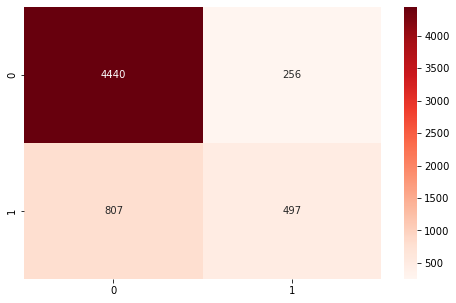

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_df, annot=True, cmap="Reds", fmt='d').plot()

## Analyzing Results

Even though we get 82% accuracy, it is not doing well with 1s.  Because we have far fewer ones than zeros.


## Step-6: SMOTE

Install it as follows


```bash
$   conda install -c conda-forge imbalanced-learn
```

In [18]:
import numpy as np
from imblearn.over_sampling import SMOTE

oversampler= SMOTE(random_state=0)

# Creating new training set
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)


print ("x_train_smote :" , X_train_smote.shape )
print ("x_test :", X_test.shape)
print ("y_train_smote :", y_train_smote.shape)
print ("y_test :", y_test.shape)

x_train_smote : (37336, 23)
x_test : (6000, 23)
y_train_smote : (37336, 1)
y_test : (6000, 1)


In [19]:
## Now examine the resampled data
y_train_smote.value_counts()

default
0          18668
1          18668
dtype: int64

In [20]:
y_train_smote.value_counts(normalize=True)

default
0         0.50
1         0.50
dtype: float64

### SMOTE target analysis

As we can see SMOTE has resampled the 0s and 1s equally (50-50)

## Step-7: Rerun Classifier on OverSampled Data

In [21]:
%%time

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

# algo = LogisticRegression(max_iter=500)
#algo = LinearSVC(max_iter=5000)
#algo = RandomForestClassifier()
algo = GradientBoostingClassifier()


model = algo.fit(X_train_smote, np.ravel(y_train_smote))
print (model)

GradientBoostingClassifier()
CPU times: user 8.81 s, sys: 950 µs, total: 8.81 s
Wall time: 8.81 s


## Step-8: Re-Evalute

In [22]:
y_pred = model.predict (X_test)

train_accuracy = model.score(X_train_smote,y_train_smote)
print ("Train accuracy: ", train_accuracy)

test_accuracy = model.score(X_test, y_test)
print ("Test accuracy: ", test_accuracy)

Train accuracy:  0.787390186415256
Test accuracy:  0.761


In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm_labels = np.unique(y)
cm_array = confusion_matrix(y_test, y_pred)
#print (cm_array)

cm_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
cm_df

,0,1
0,3835,861
1,573,731


[]

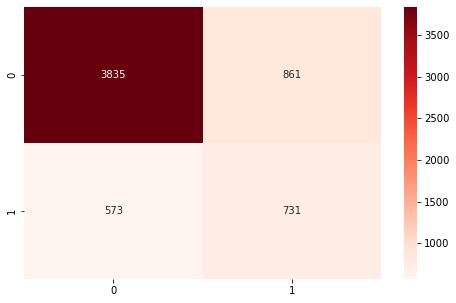

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_df, annot=True, cmap="Reds", fmt='d').plot()

## Analysis

After resampling we can see performance on 1 has improved.